# Image segmentation using the k-means algorithm

Sometimes, the color of pixels in an image can help determine where semantically close areas are. For example, road surfaces, in some circumstances, may have almost the same color. By color, we can find all road pixels. But what if we don't know the color of the road? Here, the kmeans clustering algorithm comes into play. This algorithm only needs to know how many clusters are in an image, or, in other words, how many clusters we want an image to have. With this information, it can automatically find the best clusters. In this recipe, we will consider how kmeans image segmentation can be applied using OpenCV.

To perform k-means clusterization, we should use the `cv2.kmeans` function. It takes the following arguments, respectively, input data, the number of clusters, an input/output array with labels (can be set to `None`), stop process criteria, the number of attempts, and flags to control the process of clusterization.

Let's discuss each argument. The input data must be a vector of points with float values, in our case, we have three-dimensional points. The number of clusters determines how many of them we will get in the result, the greater the value, the greater the number of clusters, but the higher the influence of noise. The input/output array with labels can be used both to determine the initial positions of the clusters and to get the resulting clusters; if we don't want to specify cluster center initialization, we should set this argument to `None`. The stop process criteria determines how long the process of segmentation works when trying to find the best cluster positions. The number of attempts defines how many times the clusterization process will be launched from different cluster initializations, to later choose the best attempt. And the flags determine the type of cluster initialization; it can be `cv2.KMEANS_RANDOM_CENTERS` for random initialization, `cv2.KMEANS_PP_CENTERS` for more sophisticated initialization, (**kmeans++ algorithm**) and `cv2.KMEANS_USE_INITIAL_LABELS` to pass user specified cluster centers (in this case, the third argument can't be `None`).

The function returns a double value for the compactness for each cluster, a vector with labels, and values for each label. The compactness of a cluster is the sum of the squared distance from each cluster point to the corresponding center. The vector with labels has the same length as the input data vector, and each of its elements represents an output cluster which has been set to the corresponding position in the input data. The values for each label are values for centers of clusters.

In this recipe, Lab color space was used, due to its property of separating color information and brightness information. In RGB space, color and brightness are mixed together across all channels, but this can negatively influence the segmentation process. 

Note that when working with `uint8` images, OpenCV applies linear processing to Lab color space values. So, one must be careful when converting between color spaces. In the case of `float32` images, pixel values must be left unchanged. See https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------  Original-----------------    Shape(512, 512, 3) image: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] [0.49803922 0.54901963 0.8901961 ] [0.46666667 0.53333336 0.88235295] [0.49411765 0.5294118  0.89411765] [0.4745098  0.5254902  0.88235295] [0.42352942 0.50980395 0.8745098 ] [0.46666667 0.54509807 0.8862745 ] [0.47058824 0.5294118  0.8745098 ] ]
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] [0.49803922 0.54901963 0.8901961 ] [0.46666667 0.53333336 0.88235295] [0.49411765 0.5294118  0.89411765] [0.4745098  0.52549

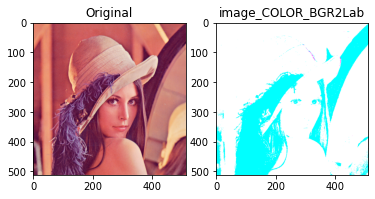

In [2]:
# Read image as float32, scale it down and convert colors to Lab
image = cv2.imread('data/Lena.png').astype(np.float32) / 255.
image_COLOR_BGR2Lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)



###################################################
print_image('Original','image',image,0,2,0,15)
print_image('image_COLOR_BGR2Lab','image_COLOR_BGR2Lab',image_COLOR_BGR2Lab,0,2,0,15)

plt_view_image(plt,[["Original",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2Lab",image_COLOR_BGR2Lab[:,:,[2,1,0]]]
                   ],
               figsize=(6,6), axis='on', cmap='gray' )

cv2.imshow('Original, image_COLOR_BGR2Lab', np.hstack((image, image_COLOR_BGR2Lab)))
cv2.waitKey()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


samples.shape: (262144, 3) image_lab.shape: (512, 512, 3) 512 * 512 == 262144


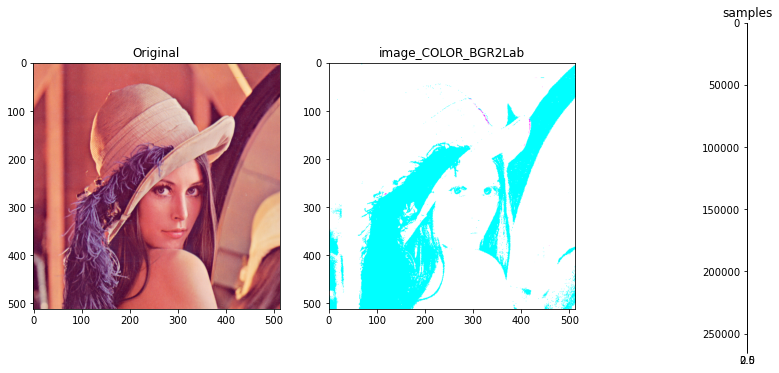

In [3]:
samples = image_COLOR_BGR2Lab.reshape((-1, 3))



####################################################
print("samples.shape:",samples.shape, "image_lab.shape:",image_COLOR_BGR2Lab.shape, 
      image_COLOR_BGR2Lab.shape[0],"*",image_COLOR_BGR2Lab.shape[1],"==", 
      image_COLOR_BGR2Lab.shape[0]*image_COLOR_BGR2Lab.shape[1])

plt_view_image(plt,[["Original",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2Lab",image_COLOR_BGR2Lab[:,:,[2,1,0]]],
                    ["samples",samples]
                   ],
               figsize=(15,6), axis='on', cmap='gray' )

In [4]:
# Set total number of classes we need
nclusters = 8
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)

print("criteria ==",criteria)
# Kmeans cluster the observations into groups of related observations 
# without any prior knowledge of those relationships

# samples : It should be of np.float32 data type, and each feature should be put in a single column.
# nclusters(K) : Number of clusters required at end
# criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. 
#            Actually, it should be a tuple of 3 parameters. They are ( type, max_iter, epsilon ):
#            3.a - type of termination criteria : It has 3 flags as below:
#                  cv2.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached. 
#                  cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter. 
#                  cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
#            3.b - max_iter - An integer specifying maximum number of iterations.
#            3.c - epsilon - Required accuracy
# attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. 
#            The algorithm returns the labels that yield the best compactness. This compactness is returned as output.
# flags : This flag is used to specify how initial centers are taken. Normally two flags are used for this : 
#         cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS.

# Finds centers of clusters and groups input samples around the clusters
# compactness : It is the sum of squared distance from each point to their corresponding centers.
# labels : This is the label array (same as ‘code’ in previous article) where each element marked ‘0’, ‘1’.....
# centers : This is array of centers of clusters.

compactness, labels, centers = cv2.kmeans(samples, 
                                          nclusters, # 8 
                                          None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


#####################################################
print("compactness:",compactness)
print("labels.shape:",labels.shape)
for i in range(0,25):
     print(labels[i], end=" ")
print("\n  sor_ar ==")

sor_ar = sorted(labels[:,0])
for i in range(0,len(sor_ar)):
     if i<len(sor_ar)-1:
        if sor_ar[i] != sor_ar[i+1]:
            print(sor_ar[i], end=" ")
print("\nlabels.flatten() ==",labels.flatten())
print("centers:\n",centers)

criteria == (3, 50, 0.1)
compactness: 16920689.967037227
labels.shape: (262144, 1)
[5] [5] [2] [2] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] [5] 
  sor_ar ==
0 1 2 3 4 5 6 
labels.flatten() == [5 5 2 ... 0 0 6]
centers:
 [[ 41.116936  42.214584  11.526631]
 [ 78.29326   11.894362  11.678937]
 [ 61.754826  27.232439  13.769395]
 [ 22.953484  35.694073  -8.582929]
 [ 45.665337  29.347715 -16.371998]
 [ 66.556625  31.441566  28.035103]
 [ 54.647106  43.76407   21.831547]
 [ 82.19087    9.389693  29.77039 ]]


In [5]:
a = np.array([[1,2], [3,4]])
print(a)
print(a.flatten())
print(a.flatten('F'))

[[1 2]
 [3 4]]
[1 2 3 4]
[1 3 2 4]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------  Original-----------------    Shape(512, 512, 3) image: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]
------  image_COLOR_BGR2Lab------    Shape(512, 512, 3) image_COLOR_BGR2Lab: float32
[ [66.11328  32.46875  21.140625] [66.11328  32.46875  21.140625] [65.91797 32.25    16.0625 ] [65.58838  32.21875  18.421875] [66.23535  31.4375   24.078125] [64.21509 35.78125 23.59375] [66.54053 32.5     22.875  ] ]
[ [66.11328  32.46875  21.140625] [66.11328  32.46875  21.140625] [65.91797 32.25    16.0625 ] [65.58838  32.21875  18.421875] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


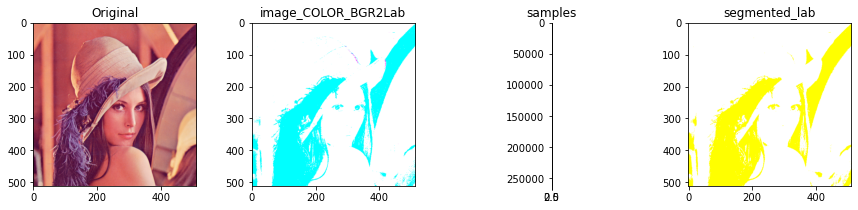

In [6]:
# Convert the colors back to normal
segmented_lab = centers[labels.flatten()].reshape(image.shape)



##########################################################
print_image('Original','image',image,0,2,0,7)
print_image('image_COLOR_BGR2Lab','image_COLOR_BGR2Lab',image_COLOR_BGR2Lab,0,2,0,7)
print_image('segmented_lab','segmented_lab',segmented_lab,0,2,0,7)

plt_view_image(plt,[["Original",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2Lab",image_COLOR_BGR2Lab[:,:,[2,1,0]]],
                    ["samples",samples],
                    ["segmented_lab",segmented_lab]
                   ],
               figsize=(15,3), axis='on', cmap='gray' )

cv2.imshow('Original, image_COLOR_BGR2Lab, segmented_lab', 
           np.hstack((image, image_COLOR_BGR2Lab, segmented_lab)))
cv2.waitKey()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------  Original-----------------    Shape(512, 512, 3) image: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]
------  image_COLOR_BGR2Lab------    Shape(512, 512, 3) image_COLOR_BGR2Lab: float32
[ [66.11328  32.46875  21.140625] [66.11328  32.46875  21.140625] [65.91797 32.25    16.0625 ] [65.58838  32.21875  18.421875] [66.23535  31.4375   24.078125] [64.21509 35.78125 23.59375] [66.54053 32.5     22.875  ] ]
[ [66.11328  32.46875  21.140625] [66.11328  32.46875  21.140625] [65.91797 32.25    16.0625 ] [65.58838  32.21875  18.421875] 

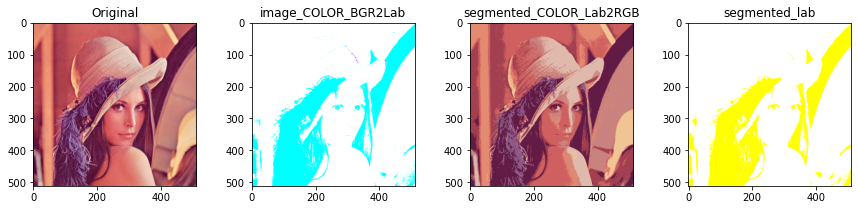

In [7]:
#Converts an image from one color space to another.
segmented_COLOR_Lab2RGB = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2RGB)



#####################################################
print_image('Original','image',image,0,2,0,7)
print_image('image_COLOR_BGR2Lab','image_COLOR_BGR2Lab',image_COLOR_BGR2Lab,0,2,0,7)
print_image('segmented_lab','segmented_lab',segmented_lab,0,2,0,7)
print_image('segmented.COLOR_Lab2RGB','segmented_COLOR_Lab2RGB',segmented_COLOR_Lab2RGB,0,2,0,7)


plt_view_image(plt,[["Original",image[:,:,[2,1,0]]],
                    ["image_COLOR_BGR2Lab",image_COLOR_BGR2Lab[:,:,[2,1,0]]],
                    ["segmented_COLOR_Lab2RGB",segmented_COLOR_Lab2RGB],
                    ["segmented_lab",segmented_lab]
                   ],
               figsize=(15,3), axis='on', cmap='gray' )

cv2.imshow('Original, segmented, image_COLOR_BGR2Lab', 
           np.hstack([image,segmented_COLOR_Lab2RGB[:,:,[2,1,0]],image_COLOR_BGR2Lab]) )
cv2.waitKey()
cv2.destroyAllWindows()